In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


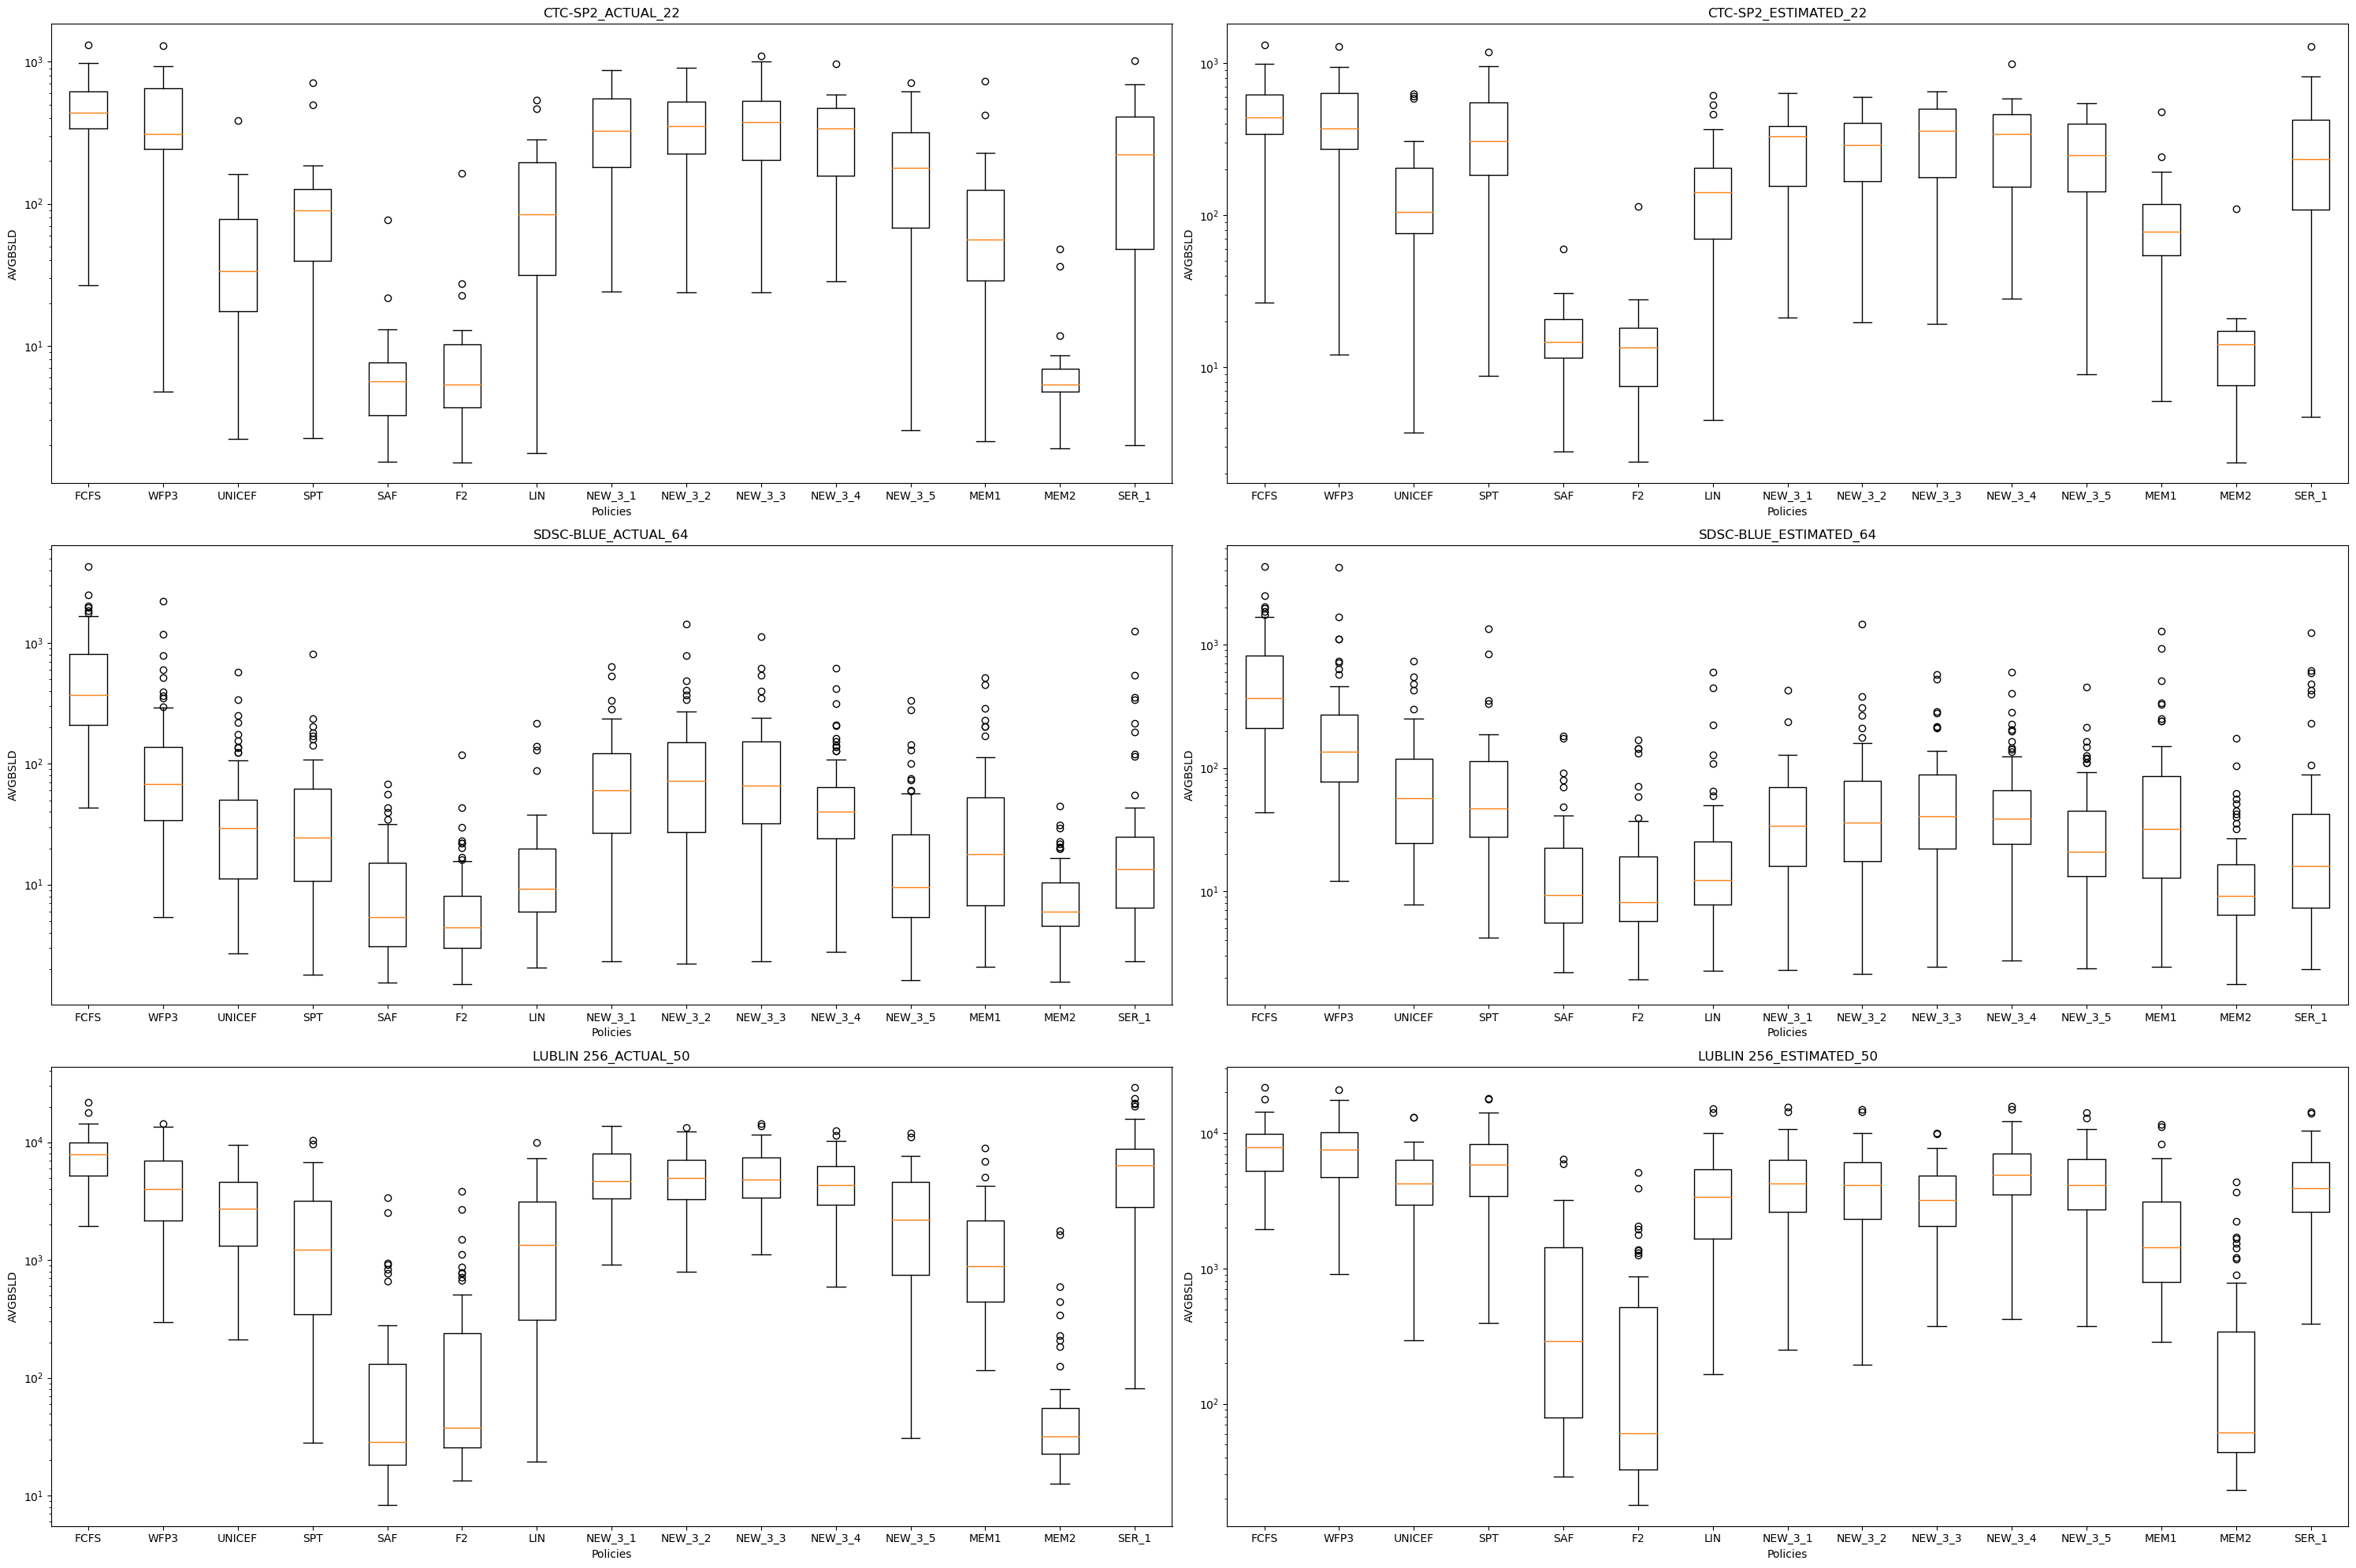

In [8]:
df=[]

# Lire le fichier CSV
df.append(pd.read_csv('CTC-SP2_ACTUAL_22_15.csv'))
df.append(pd.read_csv('CTC-SP2_ESTIMATED_22_15.csv'))
df.append(pd.read_csv('SDSC-BLUE_ACTUAL_64_15.csv'))
df.append(pd.read_csv('SDSC-BLUE_ESTIMATED_64_15.csv'))
df.append(pd.read_csv('LUBLIN 256_ACTUAL_50_15.csv'))
df.append(pd.read_csv('LUBLIN 256_ESTIMATED_50_15.csv'))
title= ['CTC-SP2_ACTUAL_22','CTC-SP2_ESTIMATED_22','SDSC-BLUE_ACTUAL_64','SDSC-BLUE_ESTIMATED_64','LUBLIN 256_ACTUAL_50','LUBLIN 256_ESTIMATED_50']
names=["FCFS","WFP3","UNICEF","SPT","SAF","F2","LIN","NEW_3_1","NEW_3_2","NEW_3_3","NEW_3_4","NEW_3_5","MEM1","MEM2","SER_1"]
# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
i=0
# Boucle sur chaque subplot
for ax in axes.flatten():
    ax.boxplot(df[i],labels=names)
    ax.set_title(title[i])
    ax.set_yscale("log")
    ax.set_xlabel("Policies")
    ax.set_ylabel("AVGBSLD")
    i=i+1

# Ajuster les espaces entre les subplots
plt.tight_layout()

# Sauvegarder la figure dans les deux formats
#plt.savefig("../../images/Final_Tester_analysis_SER.pdf")
#plt.savefig("../../images/Final_Tester_analysis_SER.png")
# Afficher la figure
plt.show()

In [11]:
data = []
files = [
    'CTC-SP2_ACTUAL_22_15.csv',
    'CTC-SP2_ESTIMATED_22_15.csv',
    'SDSC-BLUE_ACTUAL_64_15.csv',
    'SDSC-BLUE_ESTIMATED_64_15.csv',
    'LUBLIN 256_ACTUAL_50_15.csv',
    'LUBLIN 256_ESTIMATED_50_15.csv'
]

for file in files:
    data.append(pd.read_csv(file).median())

# Concaténer les DataFrames


# Calculer la moyenne de chaque colonne


# Afficher les moyennes
print(data)

[FCFS       438.369184
WFP3       309.719725
UNICEF      33.704712
SPT         90.252655
SAF          5.592878
F2           5.316921
LIN         84.347879
NEW_3_1    326.413246
NEW_3_2    350.281405
NEW_3_3    375.604073
NEW_3_4    340.576487
NEW_3_5    178.729296
MEM1        56.172036
MEM2         5.354759
SER_1      221.320024
dtype: float64, FCFS       438.369184
WFP3       369.928341
UNICEF     104.979709
SPT        306.777931
SAF         14.628445
F2          13.457998
LIN        140.303667
NEW_3_1    330.193584
NEW_3_2    289.048557
NEW_3_3    356.071046
NEW_3_4    339.078370
NEW_3_5    245.704765
MEM1        77.604733
MEM2        14.063698
SER_1      233.811585
dtype: float64, FCFS       370.216801
WFP3        67.831731
UNICEF      29.532761
SPT         24.651643
SAF          5.363575
F2           4.411869
LIN          9.219513
NEW_3_1     60.408491
NEW_3_2     71.823870
NEW_3_3     65.893765
NEW_3_4     40.175932
NEW_3_5      9.510106
MEM1        17.795967
MEM2         5.961609

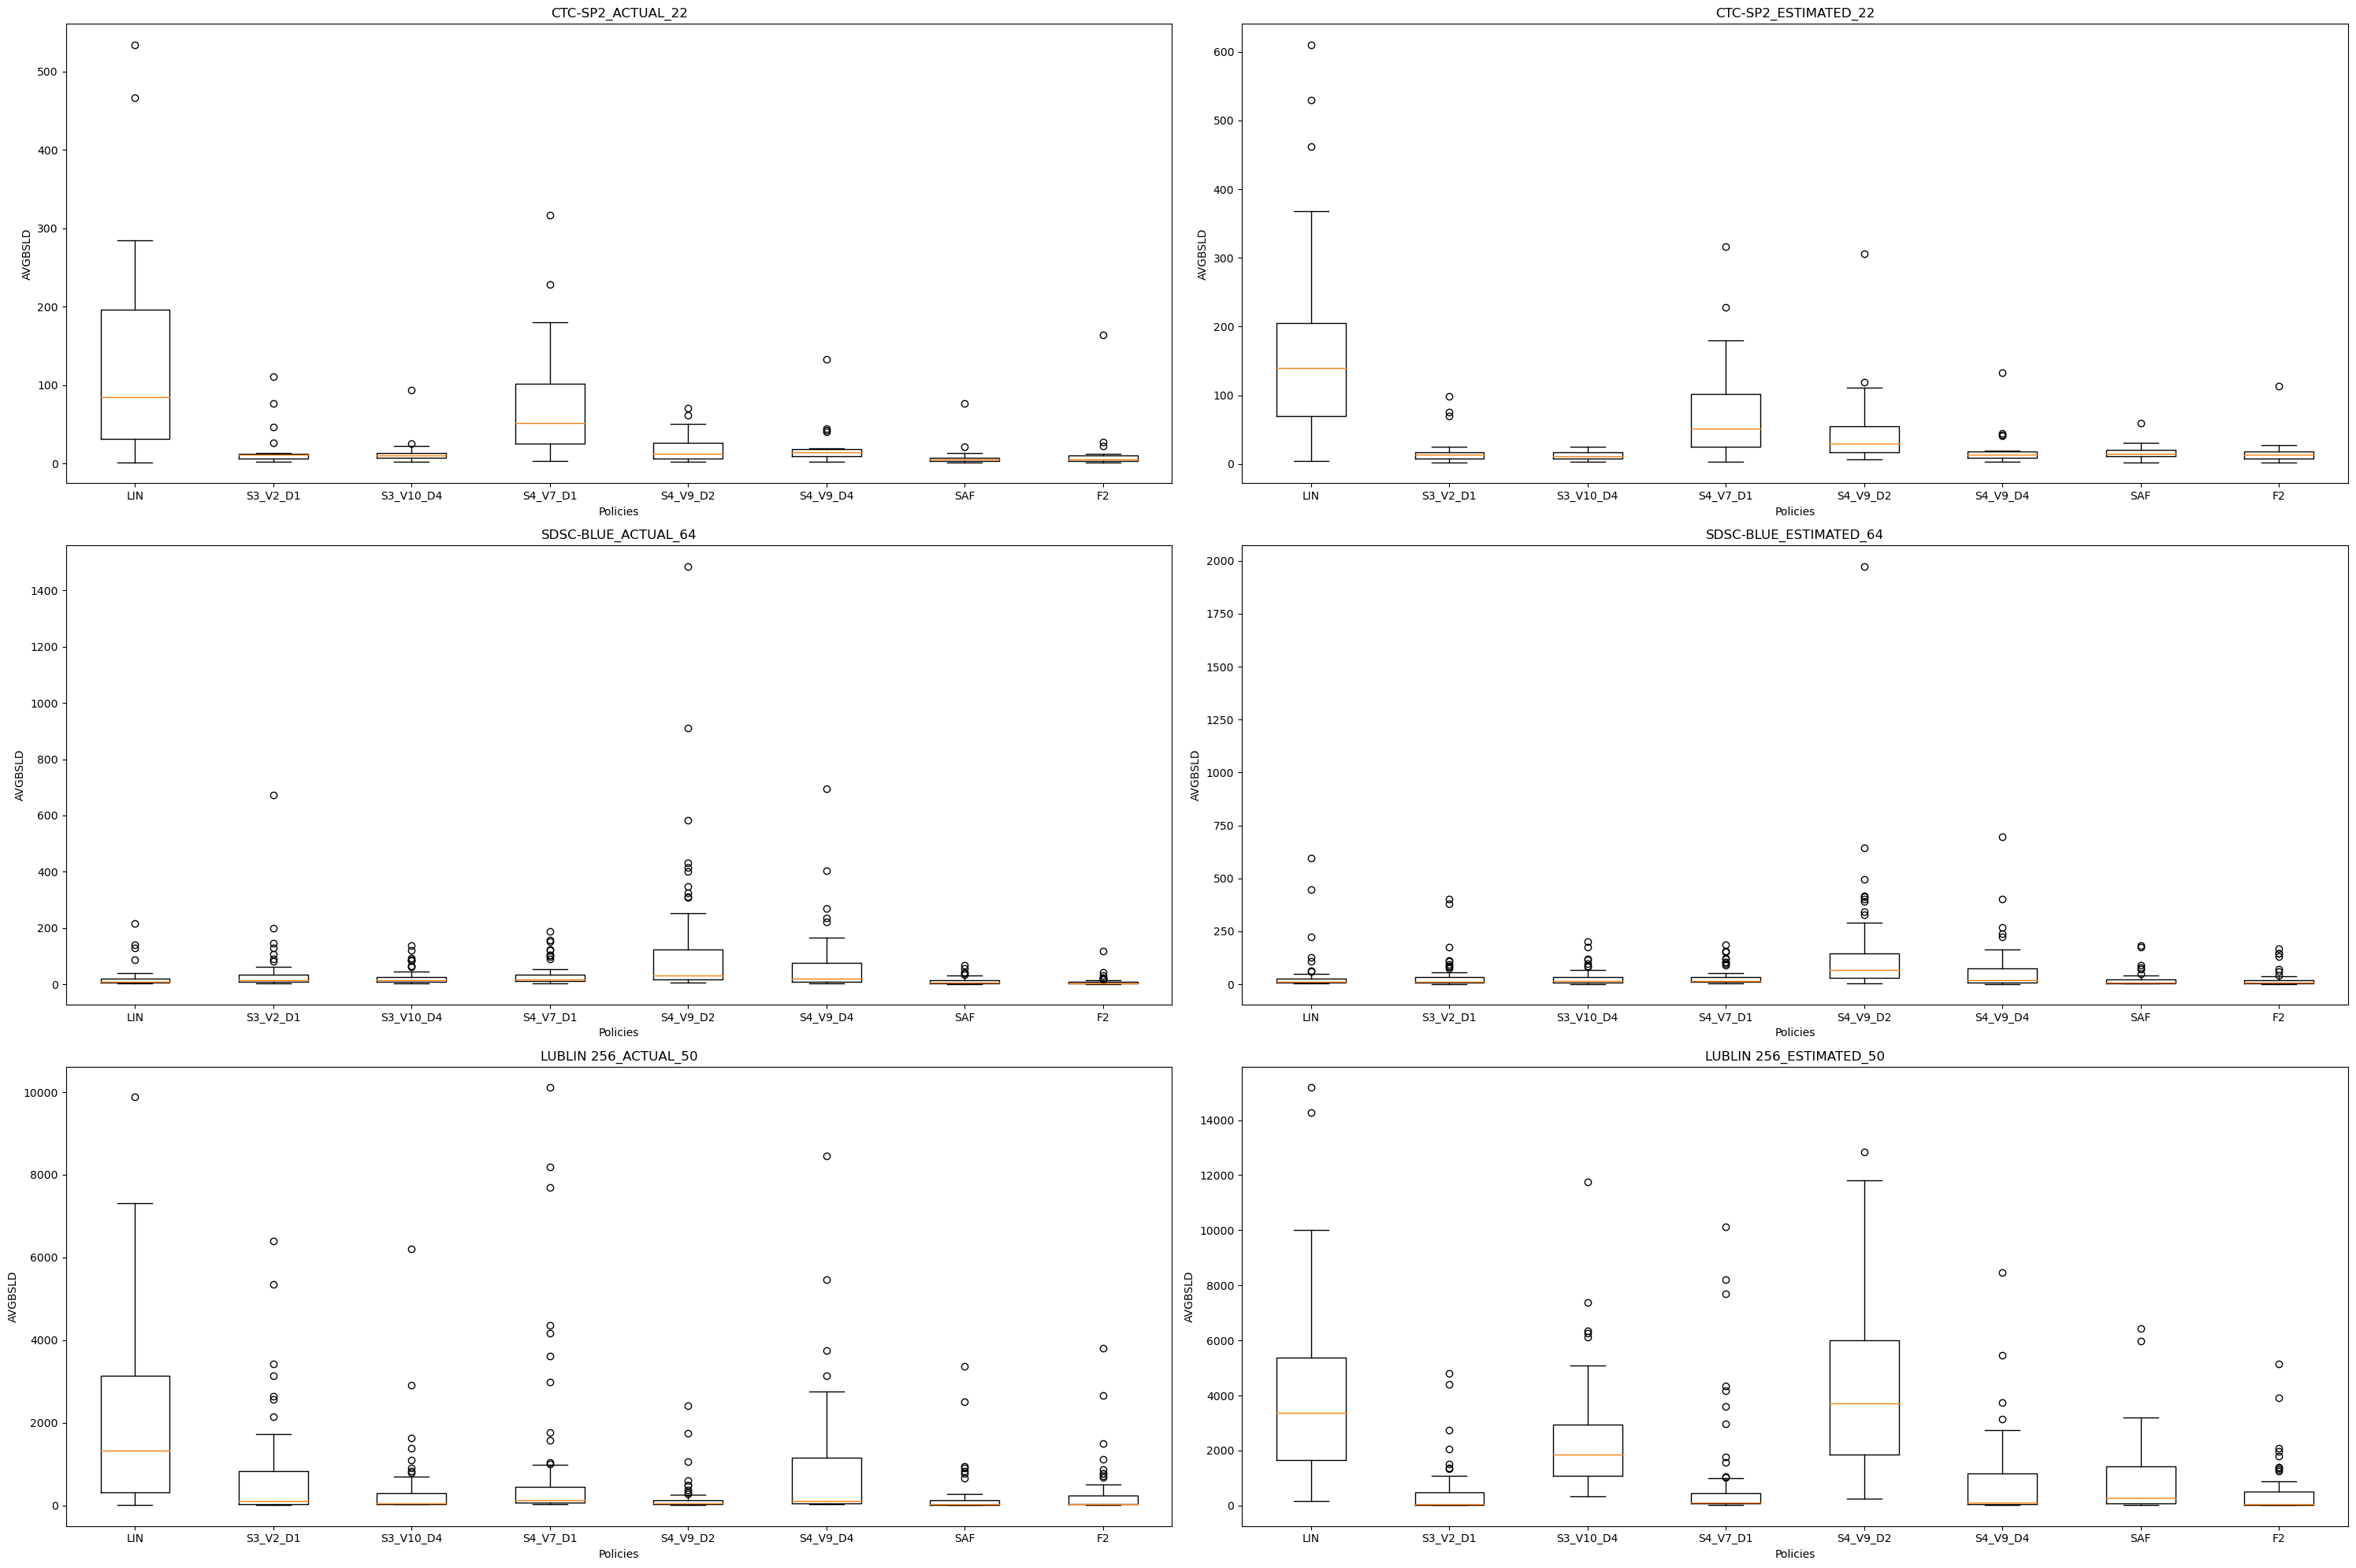

In [4]:
df=[]

# Lire le fichier CSV
df.append(pd.read_csv('CTC-SP2_ACTUAL_22_8.csv'))
df.append(pd.read_csv('CTC-SP2_ESTIMATED_22_8.csv'))
df.append(pd.read_csv('SDSC-BLUE_ACTUAL_64_8.csv'))
df.append(pd.read_csv('SDSC-BLUE_ESTIMATED_64_8.csv'))
df.append(pd.read_csv('LUBLIN 256_ACTUAL_50_8.csv'))
df.append(pd.read_csv('LUBLIN 256_ESTIMATED_50_8.csv'))
title= ['CTC-SP2_ACTUAL_22','CTC-SP2_ESTIMATED_22','SDSC-BLUE_ACTUAL_64','SDSC-BLUE_ESTIMATED_64','LUBLIN 256_ACTUAL_50','LUBLIN 256_ESTIMATED_50']
names=["LIN","S3_V2_D1","S3_V10_D4","S4_V7_D1","S4_V9_D2","S4_V9_D4","SAF","F2"]
# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
i=0
# Boucle sur chaque subplot
for ax in axes.flatten():
    ax.boxplot(df[i],labels=names)
    ax.set_title(title[i])
    ax.set_xlabel("Policies")
    ax.set_ylabel("AVGBSLD")
    i=i+1

# Ajuster les espaces entre les subplots
plt.tight_layout()

# Sauvegarder la figure dans les deux formats
#plt.savefig("../../images/Final_Tester_analysis_SER.pdf")
#plt.savefig("../../images/Final_Tester_analysis_SER.png")
# Afficher la figure
plt.show()

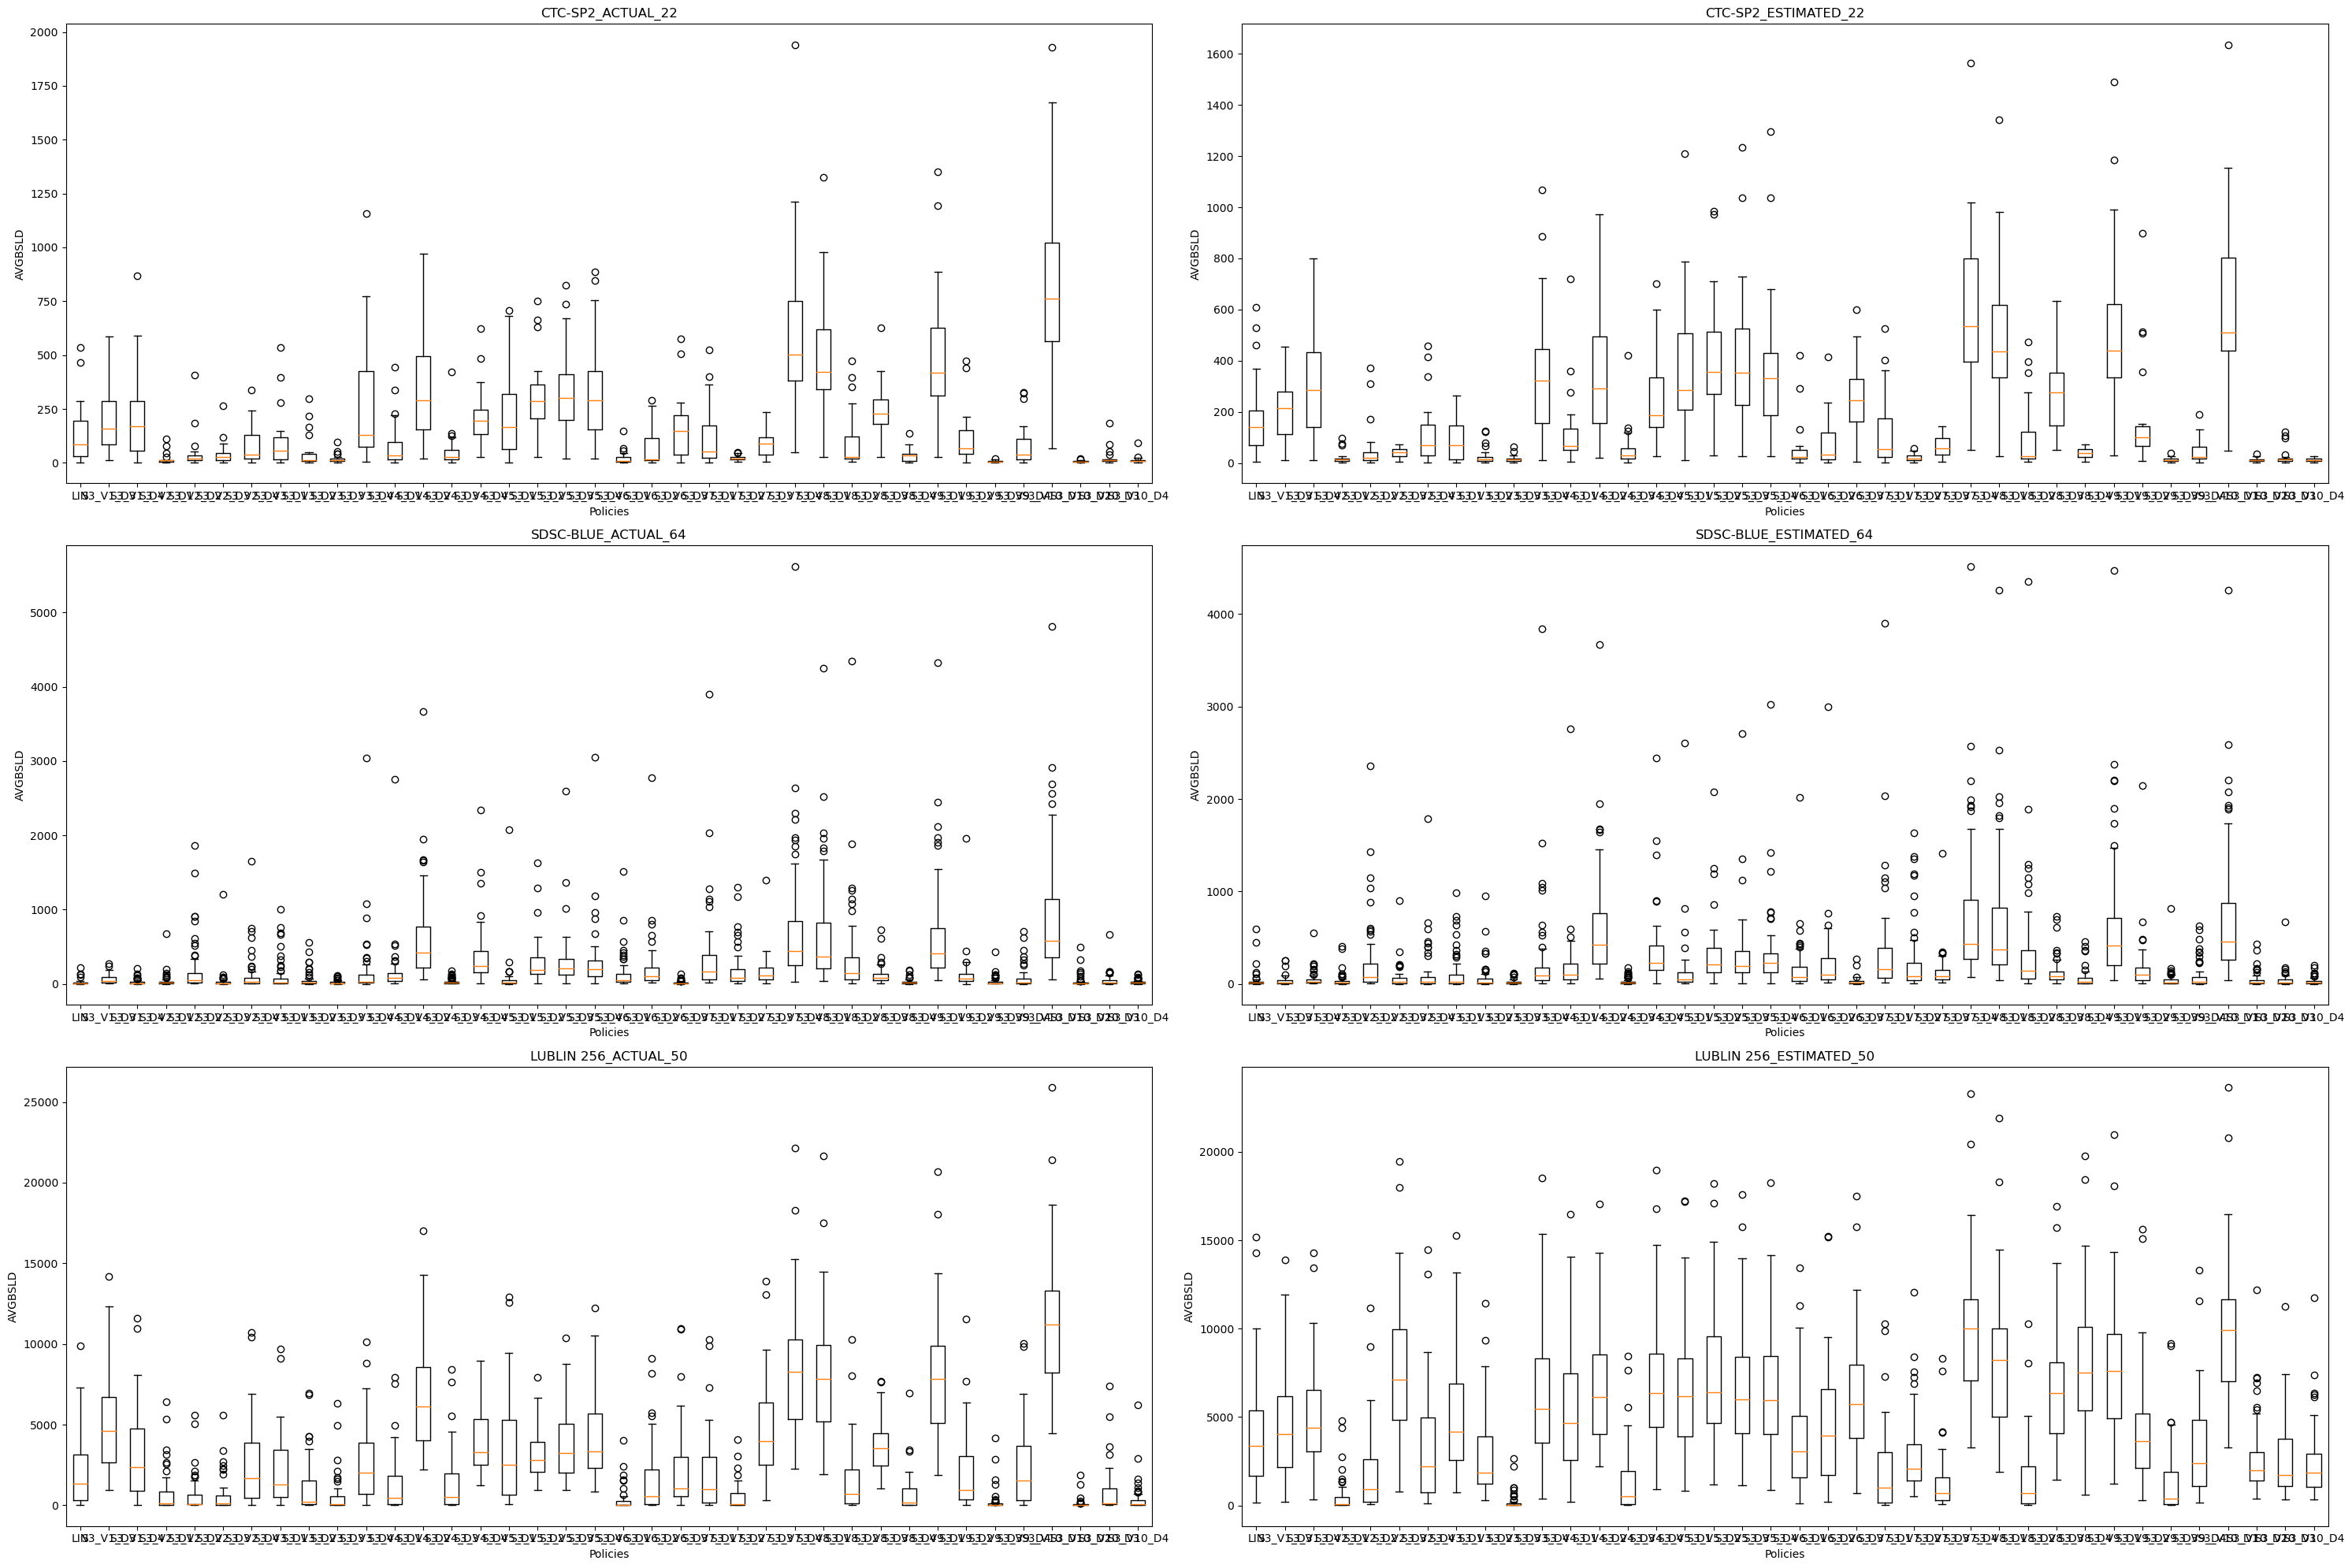

In [5]:
df=[]

# Lire le fichier CSV
df.append(pd.read_csv('CTC-SP2_ACTUAL_22_38.csv'))
df.append(pd.read_csv('CTC-SP2_ESTIMATED_22_38.csv'))
df.append(pd.read_csv('SDSC-BLUE_ACTUAL_64_38.csv'))
df.append(pd.read_csv('SDSC-BLUE_ESTIMATED_64_38.csv'))
df.append(pd.read_csv('LUBLIN 256_ACTUAL_50_38.csv'))
df.append(pd.read_csv('LUBLIN 256_ESTIMATED_50_38.csv'))
title= ['CTC-SP2_ACTUAL_22','CTC-SP2_ESTIMATED_22','SDSC-BLUE_ACTUAL_64','SDSC-BLUE_ESTIMATED_64','LUBLIN 256_ACTUAL_50','LUBLIN 256_ESTIMATED_50']
names=["LIN","S3_V1_D3","S3_V1_D4",
         "S3_V2_D1","S3_V2_D2","S3_V2_D3","S3_V2_D4",
         "S3_V3_D1","S3_V3_D2","S3_V3_D3","S3_V3_D4",
         "S3_V4_D1","S3_V4_D2","S3_V4_D3","S3_V4_D4",
         "S3_V5_D1","S3_V5_D2","S3_V5_D3","S3_V5_D4",
         "S3_V6_D1","S3_V6_D2","S3_V6_D3",
         "S3_V7_D1","S3_V7_D2","S3_V7_D3","S3_V7_D4",
         "S3_V8_D1","S3_V8_D2","S3_V8_D3","S3_V8_D4",
         "S3_V9_D1","S3_V9_D2","S3_V9_D3","S3_V9_D4",
         "S3_V10_D1","S3_V10_D2","S3_V10_D3","S3_V10_D4"]
# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
i=0
# Boucle sur chaque subplot
for ax in axes.flatten():
    ax.boxplot(df[i],labels=names)
    ax.set_title(title[i])
    ax.set_xlabel("Policies")
    ax.set_ylabel("AVGBSLD")
    i=i+1

# Ajuster les espaces entre les subplots
plt.tight_layout()

# Sauvegarder la figure dans les deux formats
#plt.savefig("../../images/Final_Tester_analysis_SER.pdf")
#plt.savefig("../../images/Final_Tester_analysis_SER.png")
# Afficher la figure
plt.show()

    vif  deg       MAE      AVGBSLD
0     1    1  0.216691  1164.351312
1     1    3  0.240473  1786.410008
2     1    4  0.244200  1581.504837
3     2    1  0.216900   257.833541
4     2    2  0.232142   582.963584
5     2    3  0.243208  1572.145913
6     2    4  0.249975  1120.586443
7     3    1  0.228000  1392.031589
8     3    2  0.240976   774.513606
9     3    3  0.242833   164.048508
10    3    4  0.237769  1797.404274
11    4    1  0.238525  1307.979757
12    4    2  0.238055  2852.011342
13    4    3  0.241292   512.305078
14    4    4  0.248847  2227.419954
15    5    1  0.231197  1941.282925
16    5    2  0.247784  2114.092431
17    5    3  0.248867  2135.773532
18    5    4  0.248857  2167.203087
19    6    1  0.227482   834.701119
20    6    2  0.242067  1235.758851
21    6    3  0.240805  1594.092510
22    7    1  0.217726   907.833805
23    7    2  0.232035   744.552530
24    7    3  0.238520  1217.308421
25    7    4  0.245384  3850.630728
26    8    1  0.217849  3423

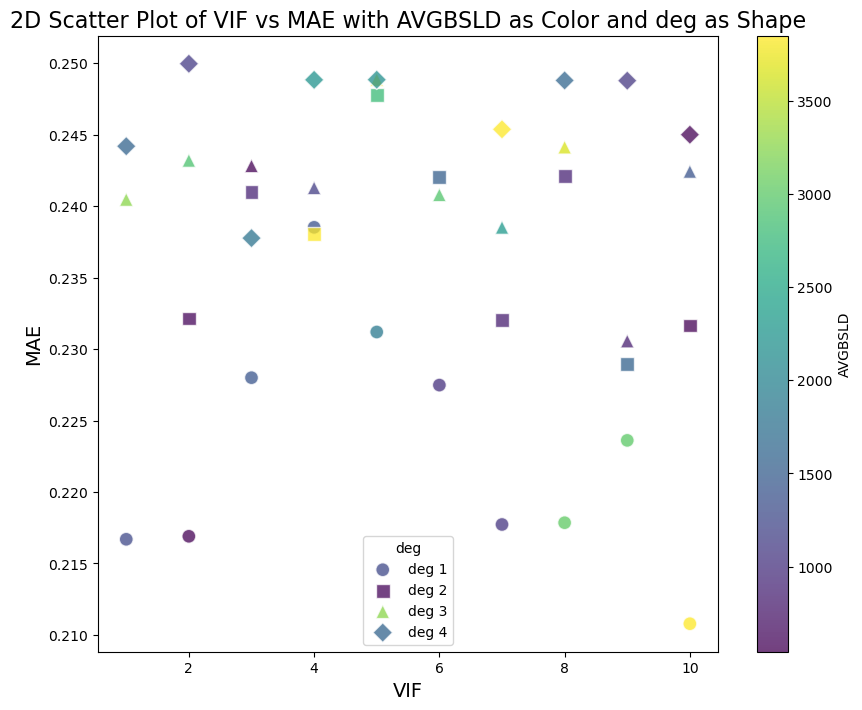

In [15]:
df = pd.read_csv("../regressor/4D_MSE.csv")
print (df)
# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Créer une palette de couleurs pour les différentes valeurs de deg
shapes = {1: 'o', 2: 's', 3: '^', 4: 'D'}
colors = df['AVGBSLD']

for shape in shapes:
    subset = df[df['deg'] == shape]
    sc = ax.scatter(subset['vif'], subset['MAE'], s=100, c=subset['AVGBSLD'], cmap='viridis', marker=shapes[shape], label=f'deg {shape}', edgecolors='w', alpha=0.75)

# Ajouter une barre de couleur
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('AVGBSLD')

# Ajouter des labels et un titre
ax.set_xlabel('VIF', fontsize=14)
ax.set_ylabel('MAE', fontsize=14)
ax.set_title('2D Scatter Plot of VIF vs MAE with AVGBSLD as Color and deg as Shape', fontsize=16)

# Ajouter une légende pour les formes
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='deg')
plt.savefig("../../images/4D_MSE.png")
plt.savefig("../../images/4D_MSE.pdf")
# Afficher le graphique
plt.show()

In [6]:
data = []
files = [
    'CTC-SP2_ACTUAL_22_38.csv',
    'CTC-SP2_ESTIMATED_22_38.csv',
    'SDSC-BLUE_ACTUAL_64_38.csv',
    'SDSC-BLUE_ESTIMATED_64_38.csv',
    'LUBLIN 256_ACTUAL_50_38.csv',
    'LUBLIN 256_ESTIMATED_50_38.csv'
]

for file in files:
    data.append(pd.read_csv(file))

# Concaténer les DataFrames
concatenated_df = pd.concat(data)

# Calculer la moyenne de chaque colonne
column_means_38 = concatenated_df.mean()

# Afficher les moyennes
print(column_means_38)

LIN          1164.351312
S3_V1_D3     1786.410008
S3_V1_D4     1581.504837
S3_V2_D1      257.833541
S3_V2_D2      582.963584
S3_V2_D3     1572.145913
S3_V2_D4     1120.586443
S3_V3_D1     1392.031589
S3_V3_D2      774.513606
S3_V3_D3      164.048508
S3_V3_D4     1797.404274
S3_V4_D1     1307.979757
S3_V4_D2     2852.011342
S3_V4_D3      512.305078
S3_V4_D4     2227.419954
S3_V5_D1     1941.282925
S3_V5_D2     2114.092431
S3_V5_D3     2135.773532
S3_V5_D4     2167.203087
S3_V6_D1      834.701119
S3_V6_D2     1235.758851
S3_V6_D3     1594.092510
S3_V7_D1      907.833805
S3_V7_D2      744.552530
S3_V7_D3     1217.308421
S3_V7_D4     3850.630728
S3_V8_D1     3423.936180
S3_V8_D2      772.708120
S3_V8_D3     2016.322381
S3_V8_D4     1615.862137
S3_V9_D1     3383.367434
S3_V9_D2     1266.398382
S3_V9_D3      333.022067
S3_V9_D4     1081.861667
S3_V10_D1    4468.807476
S3_V10_D2     551.544911
S3_V10_D3     667.106018
S3_V10_D4     542.374548
dtype: float64


In [6]:
data = []
files = [
    'CTC-SP2_ACTUAL_22_8.csv',
    'CTC-SP2_ESTIMATED_22_8.csv',
    'SDSC-BLUE_ACTUAL_64_8.csv',
    'SDSC-BLUE_ESTIMATED_64_8.csv',
    'LUBLIN 256_ACTUAL_50_8.csv',
    'LUBLIN 256_ESTIMATED_50_8.csv'
]

for file in files:
    data.append(pd.read_csv(file))

# Concaténer les DataFrames
concatenated_df = pd.concat(data)

# Calculer la moyenne de chaque colonne
column_means = concatenated_df.mean()

# Afficher les moyennes
print(column_means)

LIN          1164.351312
S3_V2_D1      257.833541
S3_V10_D4     542.374548
S4_V7_D1      411.896122
S4_V9_D2      920.520924
S4_V9_D4      362.901237
SAF           223.991682
F2            165.814373
dtype: float64


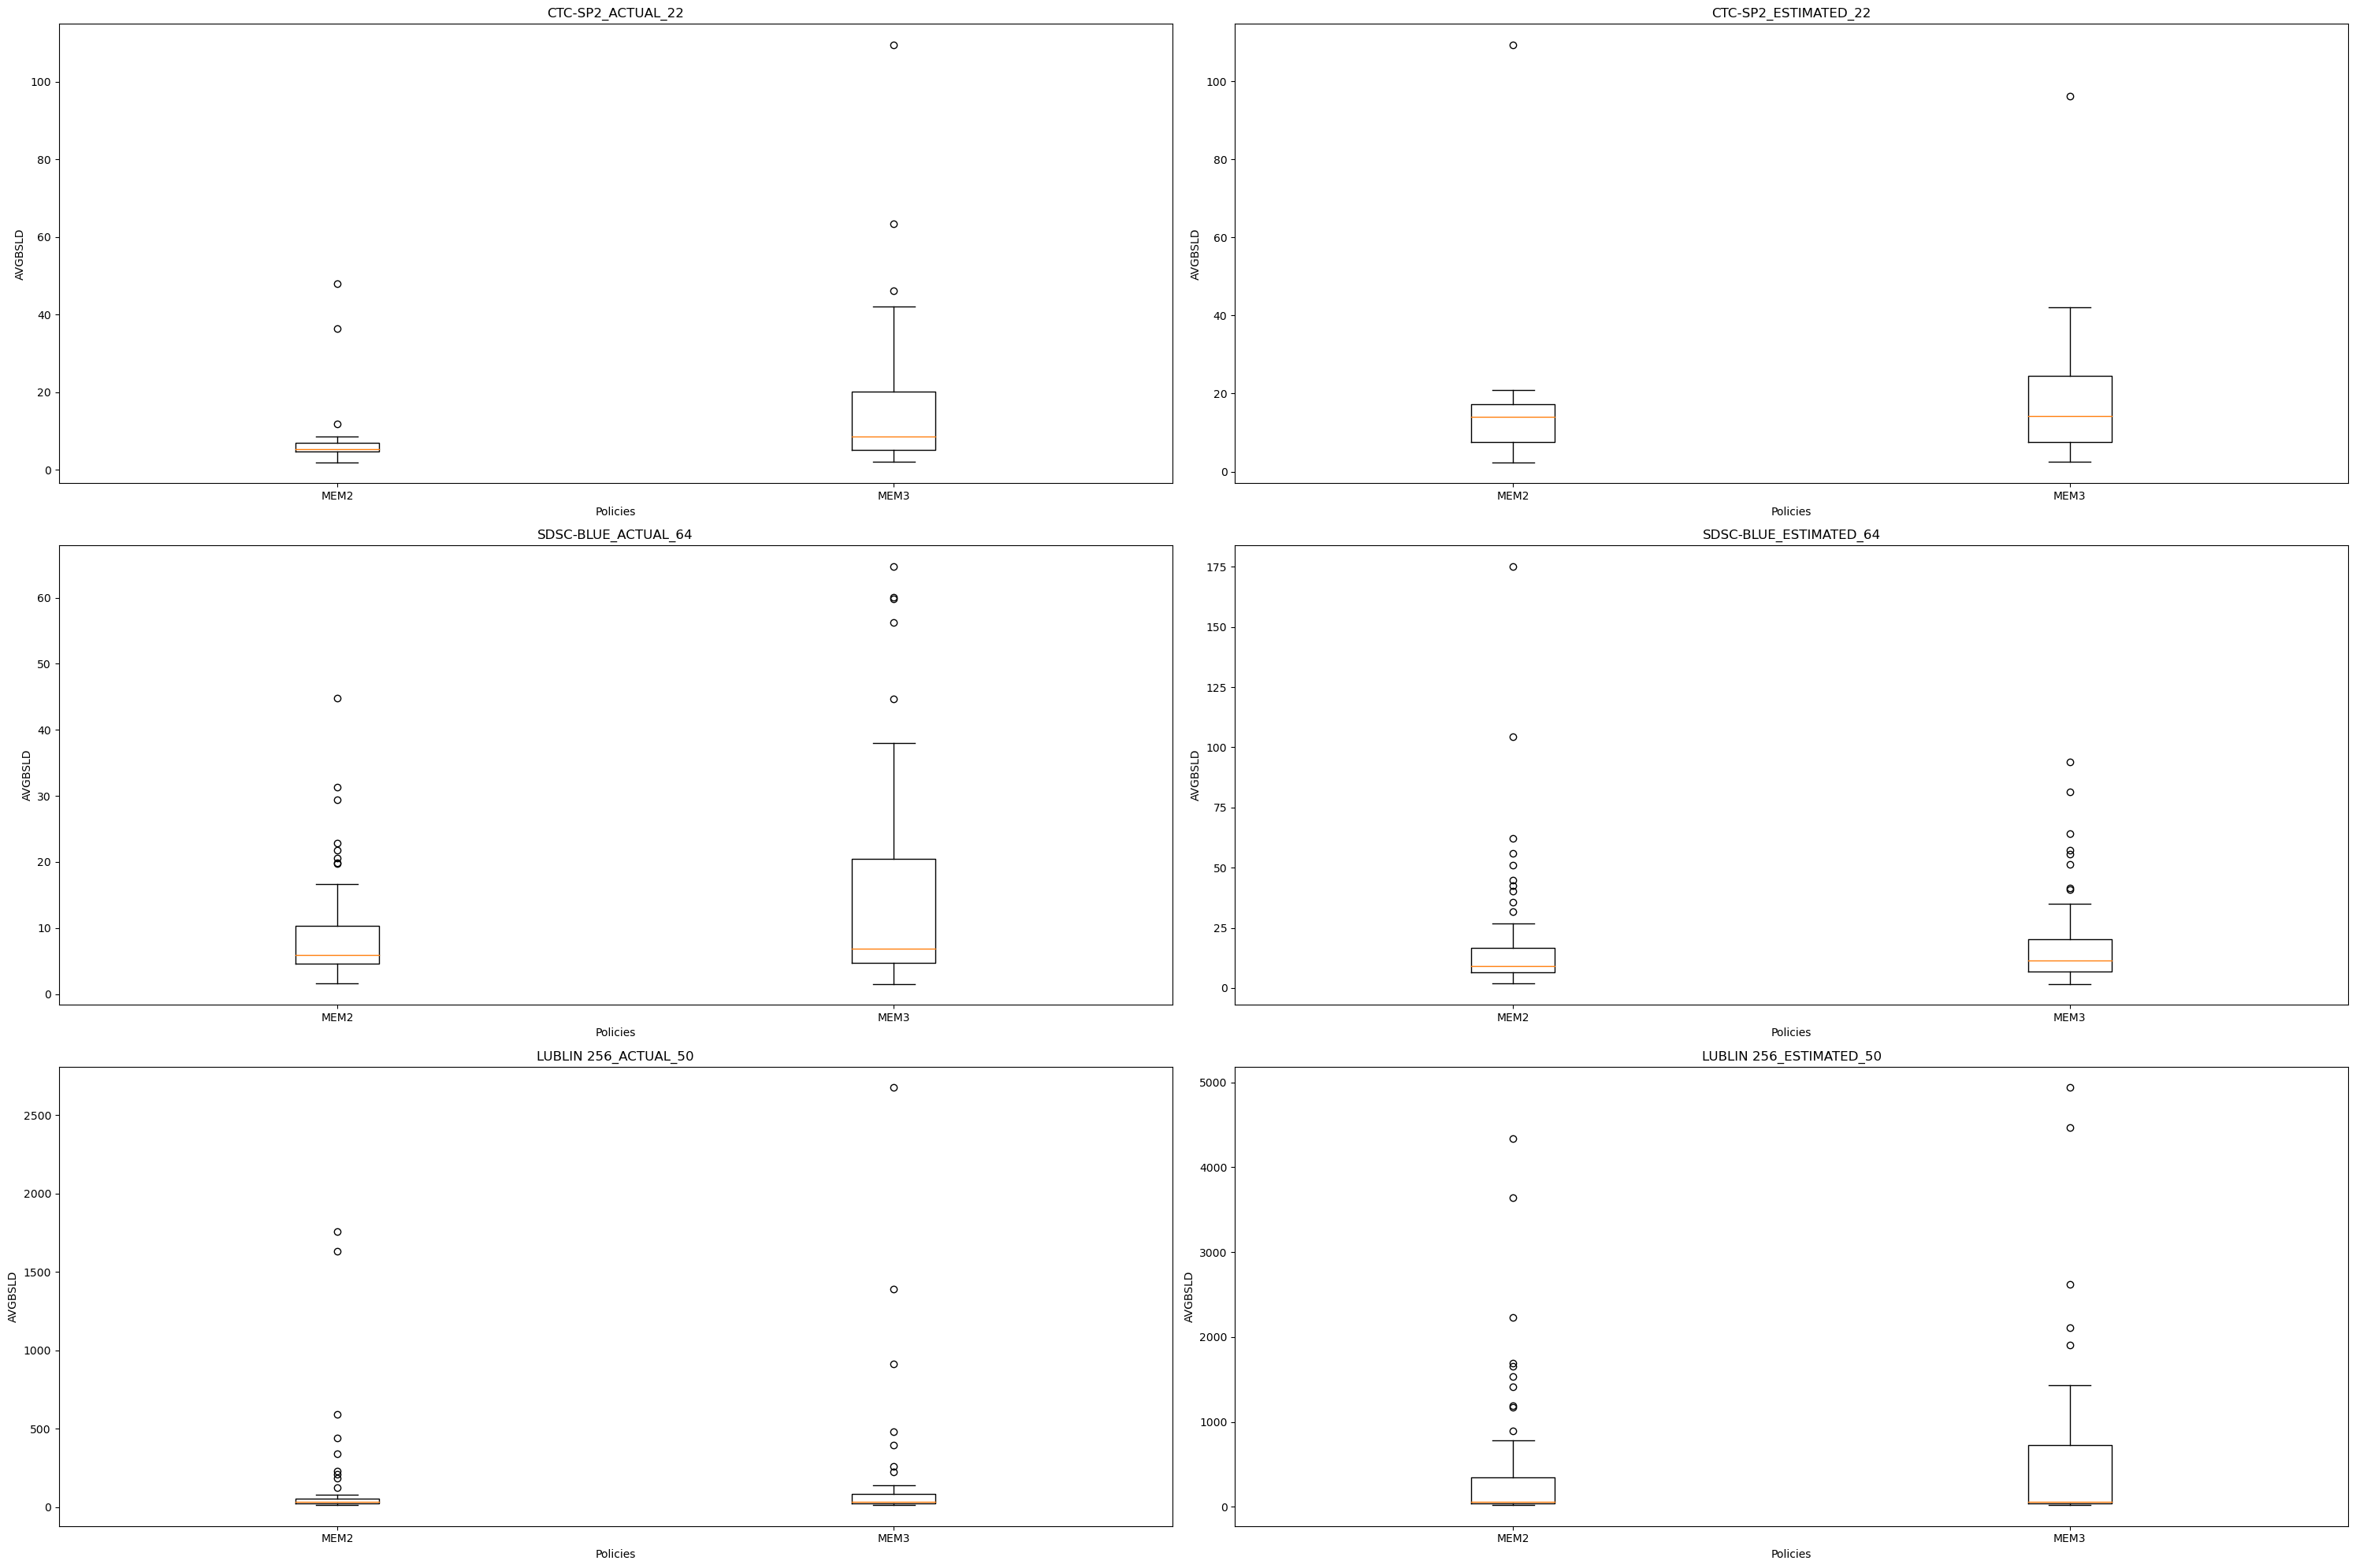

In [9]:
df=[]

# Lire le fichier CSV
df.append(pd.read_csv('CTC-SP2_ACTUAL_22_2.csv'))
df.append(pd.read_csv('CTC-SP2_ESTIMATED_22_2.csv'))
df.append(pd.read_csv('SDSC-BLUE_ACTUAL_64_2.csv'))
df.append(pd.read_csv('SDSC-BLUE_ESTIMATED_64_2.csv'))
df.append(pd.read_csv('LUBLIN 256_ACTUAL_50_2.csv'))
df.append(pd.read_csv('LUBLIN 256_ESTIMATED_50_2.csv'))
title= ['CTC-SP2_ACTUAL_22','CTC-SP2_ESTIMATED_22','SDSC-BLUE_ACTUAL_64','SDSC-BLUE_ESTIMATED_64','LUBLIN 256_ACTUAL_50','LUBLIN 256_ESTIMATED_50']
names=["MEM2","MEM3"]
# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
i=0
# Boucle sur chaque subplot
for ax in axes.flatten():
    ax.boxplot(df[i],labels=names)
    ax.set_title(title[i])
    ax.
    ax.set_xlabel("Policies")
    ax.set_ylabel("AVGBSLD")
    i=i+1

# Ajuster les espaces entre les subplots
plt.tight_layout()

# Sauvegarder la figure dans les deux formats
#plt.savefig("../../images/LIN_VS_S4_V7_D1.pdf")
#plt.savefig("../../images/LIN_VS_S4_V7_D1.png")
# Afficher la figure
plt.show()

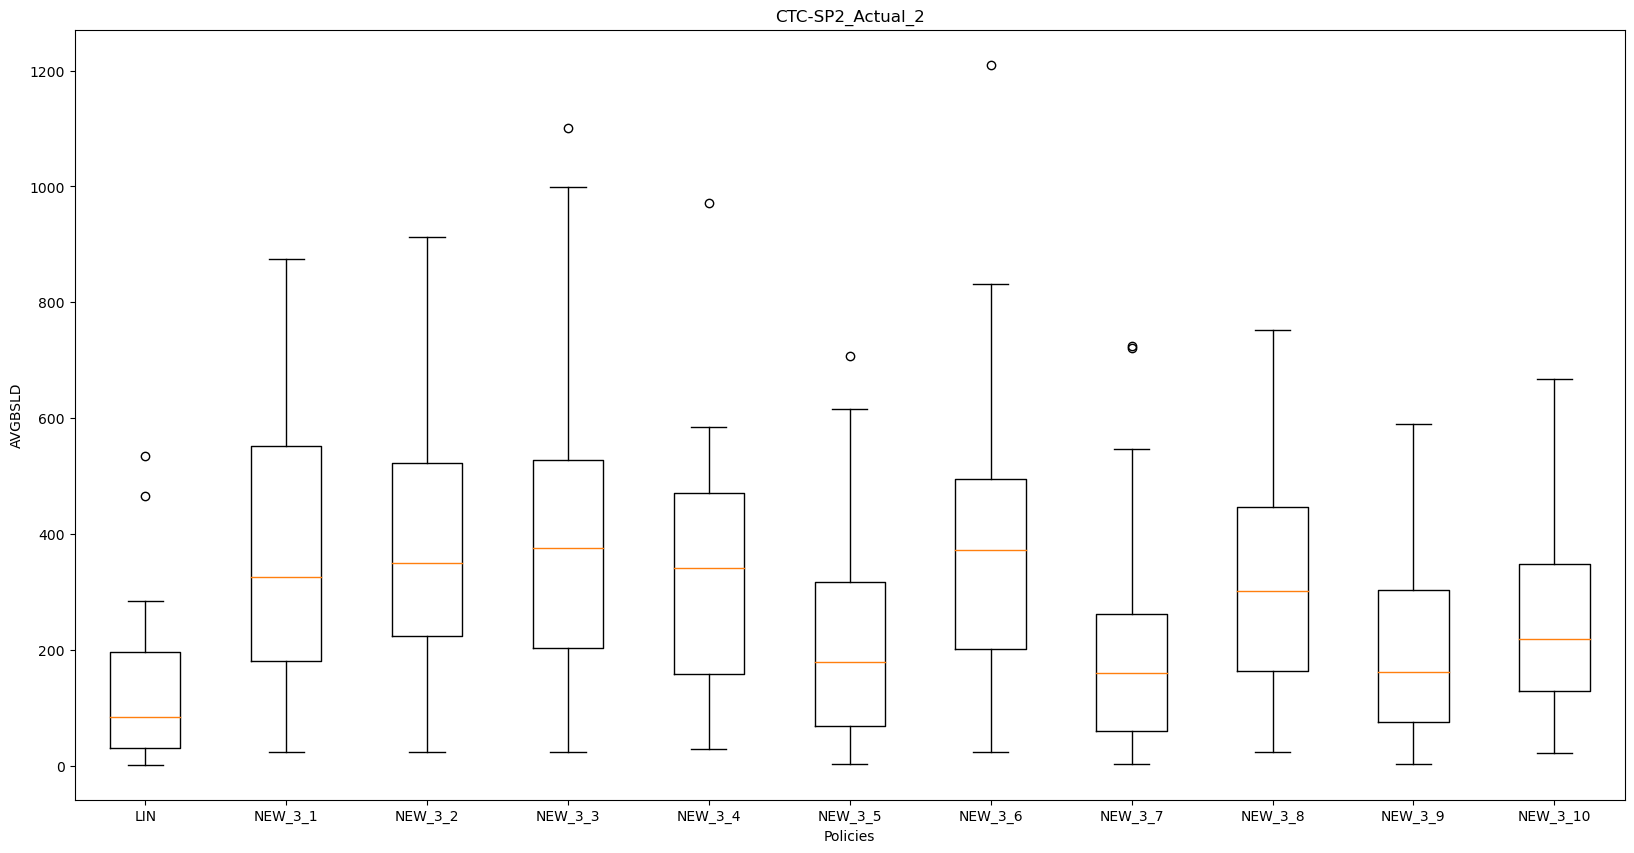

In [3]:
df = pd.read_csv('CTC-SP2_ACTUAL_22_11.csv')
plt.figure(figsize = (20, 10))
plt.boxplot(df,labels=["LIN","NEW_3_1","NEW_3_2","NEW_3_3","NEW_3_4","NEW_3_5","NEW_3_6","NEW_3_7","NEW_3_8","NEW_3_9","NEW_3_10"])



plt.title("CTC-SP2_Actual_2")
plt.xlabel("Policies")
plt.ylabel("AVGBSLD")

plt.savefig("../../images/10_models_analysis.pdf")
plt.savefig("../../images/10_models_analysis.png")